# データサイエンス・AI "Entry" 実習

# はじめに（再掲）

昨今の社会では、データサイエンスや人工知能 (AI) の果たす役割が急速に大きくなっている。例えばSiriやAlexaのような音声認識、OCRのような文字認識、あるいはECサイトにおける顧客にパーソナライズされた商品提案などは全て、多量のデータから解析・予測を行うデータサイエンス・AIの技術によって確立されている。

一方、データサイエンス・AIの分野はここ20年程度で急速に発展してきたことから、先端技術を駆使し、さらに問題解決のために活用できる、という人材が全くもって不足している、というのが現状である。

本実習では、そのような社会背景の中から、**AI・データサイエンスを利活用するスキルを身に付けるための基礎的素養を習得する**ことを目指す。



#第1, 2回の復習

第1, 2回では、「導入：データサイエンス入門」および「相関分析」と題して、データの入手・解析を行った。解析では、主にヒストグラムや散布図の描画、二つの値の関係を表す相関係数の計算を行った。

前回の内容とpythonの書き方の復習のため、コードの一部を再度実行してみよう。

###前処理

前回のデータは、**47都道府県の「人口」と「県民1人当たりの所得」のデータ**だった。

政府統計 e-statのデータから、不要な行・列や日本語文字を削除したものが`toukei2017.csv`であった。今回は時間短縮のため、前回作成した`toukei2017.csv`は配布する。

表形式のデータを取り扱うにはpandasライブラリが便利であった。また、ファイルをGoogle colabで利用するには、左側のファイルタブからアップロードする必要があったのも思い出そう。


In [ ]:
# pandasライブラリを pd という名前で使えるようにする
# pd と省略形にするのが通例である
import pandas as pd

# pd.read_csv(CSVファイル名) とすることでデータを読むことができる
data = pd.read_csv("toukei2017.csv")

In [ ]:
# 文字列を数値に変換する
# やっていること：
# (1) 1列の各要素について "," を "" に置き換える 
#     apply(lambda x: x.replace(",", ""))
# (2) 文字列を整数値に変換（キャスト）する 
#     astype(int)
data["A1101"]   = data["A1101"].apply(lambda x: x.replace(",", "")).astype(int)
data["C121101"] = data["C121101"].apply(lambda x: x.replace(",", "")).astype(int)

# もし元から適切に数値として認識されている場合には上記のコードはエラーが発生する
# その場合は、（すでに数値として認識されているので）この先の文章に進んで良い

In [ ]:
data.head() # 冒頭5件だけ閲覧する

,prefecture,A1101,C121101
0,1000,5320000,2682
1,2000,1278000,2490
2,3000,1255000,2772
3,4000,2323000,2944
4,5000,996000,2699


###ヒストグラムの描画

データの分布を見ることができるグラフが**ヒストグラム**である。
ヒストグラムは横軸に見たい値、縦軸にその値の頻度（登場回数）をプロットするグラフであり、pythonではmatplotlibのライブラリを使って描画できる。

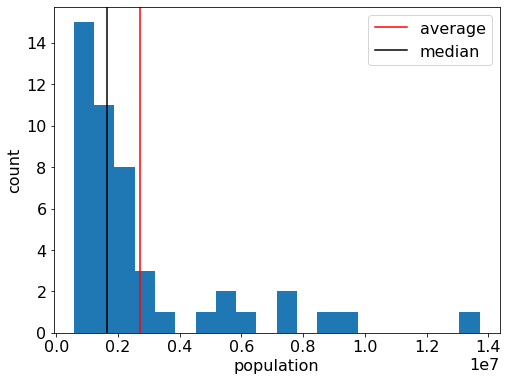

In [ ]:
import matplotlib.pyplot as plt

# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 16

# 描画（ヒストグラムと縦線）
plt.hist(data["A1101"], bins=20)
plt.axvline(data["A1101"].mean(), c="red", label="average")
plt.axvline(data["A1101"].median(), c="black", label="median")

# 軸ラベルや凡例の設定
plt.xlabel("population")
plt.ylabel("count")
plt.legend()

# 最終的な描画
plt.show()

###散布図の描画

ある二つの変数間の関係を調べるために利用するグラフが**散布図**である。散布図は調べたい二つの変数を縦軸と横軸にし、一つのデータを一点にプロットしていく図である。前回は、人口と県民一人あたりの所得の関係を散布図にした。

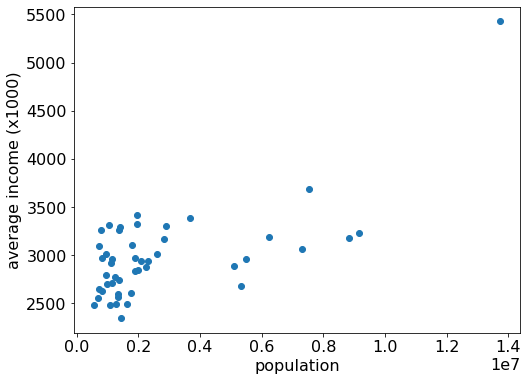

In [ ]:
# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 16

# 描画（散布図）
plt.scatter(data["A1101"], data["C121101"])

# 軸ラベルの設定
plt.xlabel("population")
plt.ylabel("average income (x1000)")

# 最終的な描画
plt.show()

###相関分析

二つの変数の間の関係を定量的に表す値の一つが**相関係数**である。

相関係数は **$-1$ 以上 $+1$ 以下の値**をとり、**絶対値が大きいほど**（絶対値が $1$ に近いほど）**強く関係しあっていることを意味**する。また、正の場合は「片方が大きくなるともう片方も大きくなる」関係を、負の場合は「片方が大きくなるともう片方は小さくなる」関係を示すのであった。

In [1]:
import numpy as np
# corrcoef関数は行列の形式で相関係数を出力する
# 1つめの数値群と2つめの数値群との相関係数は
# 1行2列目 あるいは 2行1列目 にアクセスすることで取得できる
coef = np.corrcoef(data["A1101"], data["C121101"])[0, 1]

# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 16

# 描画（散布図）
# 引数 s で点の大きさを変えられる
plt.scatter(data["A1101"], data["C121101"], label=f"corrcoef r = {coef:.3f}", s=100)

plt.xlabel("population")
plt.ylabel("average income (x1000)")
plt.legend()

# 最終的な描画
plt.show()

NameError: name 'data' is not defined

以上がこれまでの内容である。

pythonの書き方やGoogle colabの使い方、二つの値の相関を調べる方法について復習したところで、今回の内容を始めよう。

---

# 第3回 - 回帰分析



## 回帰分析とは


![](https://i.imgur.com/Bf0OtmG.png)

第3回の演習では**回帰分析**について学ぶ。回帰分析とは興味のある変数 $y$ と他の変数 $x$ の関係を定量的に表す分析であり、特に$y$ が連続な値をとるものである。（注1）

例えば、$x$ を企業の業績、 $y$ を株価としたり、 $x$ を広告費、 $y$ を売上とするような分析が考えられるだろう。

適切に回帰分析ができれば、$x$と$y$の関係を定量的に把握することができるほか、$x$から$y$を予測することが可能になる。

なお、予測したい変数 $y$ のことを**目的変数**や**従属変数**と呼び、予測に使う変数 $x$ のことを**説明変数**や**独立変数**と呼ぶ。本資料では目的変数と説明変数を用いる。

## (1) データ分析目的の設定

2022年の夏は猛暑が続き、電力需要の増大が社会問題となっている。
電力は需要に合わせて適切な量を供給しなければ周波数が安定せず、停電や接続している機械の故障を招くため、電力会社では常に今後の電力需要を予測し、発電所の出力を調節している。

そこで、第3回では**気象情報を基に将来の電力需要を予測する**ことを目的とし、東京における夏の日の気温と消費電力の関係を分析することにする。

## (2) データ収集・整理




データ分析によって見つけたい事物を決定したら、次にその**目的に適したデータ**を収集する。

今回は前回よりもやや実務的なデータ整理についてもpythonで行ってみる。
Entry向けとしてはやや難しいが、このような操作がpythonで簡単にできると理解しておけば今のところはよいだろう。

###気温データ
気温のデータは[気象庁のデータベース](https://www.data.jma.go.jp/gmd/risk/obsdl/index.php)からダウンロードできる。
ブラウザからこのページにアクセスし、「地点を選ぶ」から東京都→東京、
「項目を選ぶ」から「データの種類」を「日別値」に、「項目」を「日最高気温」のみ選択、「期間を選ぶ」から「連続した期間で表示する」、期間を「2020年7月1日から2020年7月31日まで」とする。設定が終わったら右の「CSVファイルをダウンロード」からファイルをダウンロードする。

続いて、第1回と同様に、データから不要な部分や日本語の部分を削除しよう。

<img src="https://i.imgur.com/yGaq1fr.png" alt="気温データ" width="400"/>

上のようなデータが開けるだろうか。
このファイルから最初のヘッダー部分を削除し、「年月日」の列と「最高気温」の列のみを残す。また、列名はそれぞれ「date」と「highest_temp」に変更する。

<img src="https://i.imgur.com/X6LrKeO.png" title="編集後">

このファイルを`highest_temp202007.csv`として保存せよ。

###電力データ

電力のデータは[東京電力のwebサイト](https://www.tepco.co.jp/forecast/)からダウンロードできる（実際には、東京の消費電力ではなく東京電力管内全体の消費電力のデータである）。 ブラウザからこのページにアクセスし、右にある「データのダウンロード」の「過去の電力使用実績データ」へ進む。「2020年」を右クリックして「リンク先を名前をつけて保存」等からcsvとして保存する。

<img src="https://i.imgur.com/14ljSm5.png" title="電力データ"/>

このファイルから最初のヘッダー部分を削除する。今回はすべての列を使うので列の削除はせず、列名をそれぞれ「date」「time」「demand」に変更する。

その他の前処理はpythonで行うので、この状態で`demand2020.csv`として保存せよ。

<img src="https://i.imgur.com/KBrNVcF.png" title="編集後">

続いて、このファイルをpythonで読み込みさらに前処理を行う。ファイルをGoogle colabにアップロードし、pandasで読み込む。

In [ ]:
# pandasライブラリを pd という名前で使えるようにする
# pd と省略形にするのが通例である
import pandas as pd

# pd.read_csv(CSVファイル名) とすることでデータを読むことができる
demand = pd.read_csv("demand2020.csv")

In [ ]:
# demand の先頭を表示する
demand.head()

,date,time,demand
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


さて、データの現状と今回欲しい状態を確認しておこう。

* 1月から12月までになっている。今回は7月の区間だけを取り出したい。
* 1日あたり（0時から23時までの）24データある。今回は最高気温のときのデータとして、14時のデータだけを取り出したい。

上から順に解決していく。

In [ ]:
# 7月のデータだけを取り出す

# 各行についてdateの列に"2020/7/"を含むかどうかを判定
demand_isJuly = demand["date"].str.contains("2020/7/")

# 判定した条件をもとにdemandを絞り込み、更新
demand = demand[demand_isJuly]

In [ ]:
demand.head() # 先頭のみ表示。7/1～になっているはず

,date,time,demand
4368,2020/7/1,0:00,2701
4369,2020/7/1,1:00,2530
4370,2020/7/1,2:00,2463
4371,2020/7/1,3:00,2470
4372,2020/7/1,4:00,2482


In [ ]:
demand.tail() # 末尾のみ表示。～7/31になっているはず

,date,time,demand
5107,2020/7/31,19:00,3735
5108,2020/7/31,20:00,3525
5109,2020/7/31,21:00,3303
5110,2020/7/31,22:00,3148
5111,2020/7/31,23:00,2957


In [ ]:
# 14:00のデータだけ取り出す

# 完全一致の場合 == で判定できる
demand_is14oclock = (demand["time"] == "14:00")

# 判定した条件をもとにdemandを絞り込み、更新
demand = demand[demand_is14oclock]

In [ ]:
demand.head()

,date,time,demand
4382,2020/7/1,14:00,3909
4406,2020/7/2,14:00,4194
4430,2020/7/3,14:00,3777
4454,2020/7/4,14:00,3106
4478,2020/7/5,14:00,2978


In [ ]:
# timeの列はいらないので削除
demand = demand.drop("time", axis=1)

# indexを振りなおす
demand = demand.reset_index(drop=True)
demand.head()

,date,demand
0,2020/7/1,3909
1,2020/7/2,4194
2,2020/7/3,3777
3,2020/7/4,3106
4,2020/7/5,2978


この操作によって、7月だけ、かつ各日の14時の気温だけを取り出すことができた。


### データの結合

さて、二つのデータが用意できたので、この二つを結合して回帰分析に使うデータを完成させたい。この操作もpythonで行うことができる。

まず、`highest_temp202007.csv`をアップロードし、読み込んでおく。

In [ ]:
# 読み込んで先頭を表示
temperature = pd.read_csv("highest_temp202007.csv")
temperature.head()

,date,highest_temp
0,2020/7/1,26.7
1,2020/7/2,30.8
2,2020/7/3,28.7
3,2020/7/4,27.7
4,2020/7/5,28.1


続いて二つの表を結合する。どちらも日付が同じ順に並んでいるので、単純に列を結合すればよい（注２）。

表の結合は`pd.concat()`を用いる。（concat: concatenate 連結する）

In [ ]:
# 二つの表を結合する。
data = pd.concat([temperature, demand["demand"]], axis=1) # axis=1: 列方向に結合
data.head()

,date,highest_temp,demand
0,2020/7/1,26.7,3909
1,2020/7/2,30.8,4194
2,2020/7/3,28.7,3777
3,2020/7/4,27.7,3106
4,2020/7/5,28.1,2978


これで表を結合することができた。この結果を`data`としておき、以降の回帰分析で利用する。

また、この表をcsvとして保存してダウンロードすることもできる。

In [ ]:
data.to_csv("temp_demand202007.csv", index=None)

上のセルを実行することで左のファイルタブに`temp_demand202007.csv`が現れ、右クリックすることでブラウザからダウンロードすることができる。

## (3) 分析・解析


さて、ようやくデータの準備が完了した。ここからはデータの分析・解析ということで、データの可視化を行った後に回帰分析を行う。

### データの可視化

回帰分析を行う前に、本当にこの二つの変数に関連があるのかを確認してみよう。二つの変数の関連は前回学習した散布図と相関係数で見てみるのが簡単である。

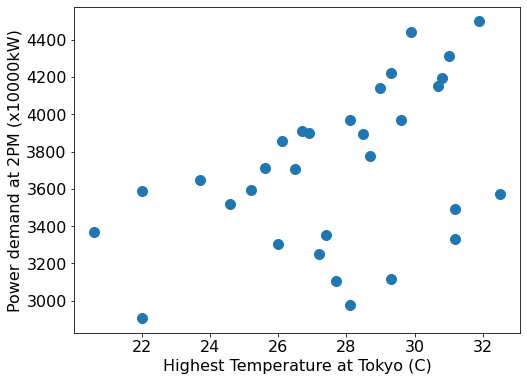

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 16

# グラフの作成（散布図）
plt.scatter(data["highest_temp"], data["demand"], s=100)

# 軸ラベルの設定
plt.xlabel("Highest Temperature at Tokyo (C)")
plt.ylabel("Power demand at 2PM (x10000kW)")

# 最終的な描画
plt.show()

### 単回帰

さて、ようやく今回のメインである回帰分析を行っていこう。今回行うのは回帰分析の中でももっとも簡単な手法である**単回帰**である。

単回帰は一つの目的変数$y$を一つの説明変数$x$で表す手法で、この関係を$y＝ax＋b$という一次方程式の形で表現する（下図）。

単回帰は機械学習ライブラリ`scikit-learn`（略称`sklearn`）の`LinearRegression`で行うことができる。

![](https://i.imgur.com/Bf0OtmG.png)

データを一次方程式の形で表現する例。


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

この状態ではまだモデルにデータを渡していないので推定はされていない。

scikit-learnでのモデルの学習（単回帰においては、傾き$a$と切片$b$をデータから決定する操作）は`.fit()`で行うことができる。

In [ ]:
# モデルの学習（一次方程式の傾きと切片を決める）
x = data["highest_temp"].to_numpy().reshape(-1, 1)
y = data["demand"]
model.fit(x, y)

LinearRegression()

In [ ]:
# 学習済みモデルから傾きaと切片bを取り出す
a = model.coef_[0] # coef: coefficient 係数
b = model.intercept_ # intercept: 切片

print(a, b)

63.14351722471949 1954.4794264900218


$a,\ b$はそれぞれ約$63.1, 1954$程度であった。つまり、$y＝63.1x＋1954$
の関係が推定されたことになる。

続いて、今回のデータにあった各日の気温に対して、今回のモデルの予測値がいくらになるかを計算してみる。それぞれのデータに対して上の練習のように$y=63.1x+1954$を計算することもできるが、scikit-learnでは予測を行うための便利な関数`predict()`を利用することでより簡便に予測値を計算できる。

In [ ]:
# predict()関数で予測値を計算。
highest_temp = data["highest_temp"].to_numpy().reshape(-1, 1) # 予測できる形式に変形
y_pred = model.predict(highest_temp) # 予測
y_pred

array([3640.41133639, 3899.29975701, 3766.69837084, 3703.55485361,
       3728.8122605 , 3653.04003983, 3804.58448117, 3754.06966739,
       3602.52522606, 3728.8122605 , 3924.5571639 , 4006.64373629,
       3545.69606055, 3450.98078472, 3343.63680543, 3507.80995022,
       3255.23588132, 3343.63680543, 3804.58448117, 3968.75762596,
       3785.64142601, 3842.47059151, 3596.21087433, 3671.983095  ,
       3684.61179845, 3924.5571639 , 3892.98540529, 3911.92846046,
       3570.95346744, 3627.78263295, 3823.52753634])

この結果を実際の値と並べて表にしてみよう。

In [ ]:
result = pd.DataFrame({"date": data["date"], "real": data["demand"], "predicted": y_pred})
result

,date,real,predicted
0,2020/7/1,3909,3640.411336
1,2020/7/2,4194,3899.299757
2,2020/7/3,3777,3766.698371
3,2020/7/4,3106,3703.554854
4,2020/7/5,2978,3728.812261
5,2020/7/6,3899,3653.040040
6,2020/7/7,4223,3804.584481
7,2020/7/8,3894,3754.069667
8,2020/7/9,3856,3602.525226
9,2020/7/10,3970,3728.812261


###回帰結果の可視化

上の表を見て、どのような評価ができるだろうか。ほとんど差がない日もあるし、数百ほどずれている日もあるようだが、この表を見て全体がどうなっているか把握するのは難しい。

そこで、推定された関係$y=63.1x+1954$を散布図に重ね書きして、どのようなモデルが学習されたのか確認してみよう。

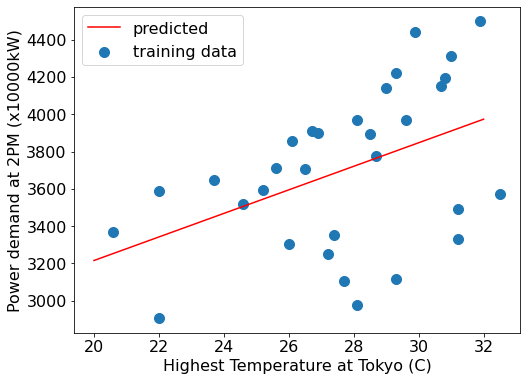

In [ ]:
# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 16

# グラフの作成（散布図）
plt.scatter(data["highest_temp"], data["demand"], 
            label=f"training data", s=100)

# ---ここを追加---
# 回帰結果の直線を描画
a = 63.1
b = 1954
xg = np.arange(20, 33) # xのリストを用意
yg = a * xg + b # y = a * x + b でyを計算
plt.plot(xg, yg, color="red", label=f"predicted") # 直線をプロット
# ---ここまで---

# 軸ラベルの設定
plt.xlabel("Highest Temperature at Tokyo (C)")
plt.ylabel("Power demand at 2PM (x10000kW)")
plt.legend()

# 最終的な描画
plt.show()

ここまでの内容で、データを表現する数式を推定することができた。

しかし、今回の分析の目標は**気象情報を基に将来の電力需要を予測する**ことであるから、この式を使って実際に電力需要を予測してみたい。今日や明日の天気予報を用いて予測することももちろん可能だが、今回は正解と予測値を比較したいので昨日の値を用いよう。

----

#### <font color=blue>【練習】得られた式から予測を行う</font> 

昨日の東京の最高気温の値を調べ、昨日14時の消費電力の値を予測せよ。（33.6℃: 2022/7/27）

なお、もし夏以外にこの演習を行う場合は7月のモデルでは予測できないため、直近の7月1日の気温と消費電力を用いて行うこと。


1. 予測の式 $y=63.1x+1954$ を用いて、電卓やExcelなどによって計算する。

2. scikit-learnの`predict()`を用いて計算する。（二つの値はおおよそ同じになっているはずである）

3. 実際の昨日14時の消費電力の値を[東京電力のwebサイト](https://www.tepco.co.jp/forecast/)から調べ、予測値と比較せよ。もし予測が大きく（目安で20%以上）外れた場合、なぜ予測が外れたか考察せよ。


----

In [7]:
x_yesterday = 33.6
y_yesterday = 63.1 * x_yesterday + 1954
print(y_yesterday)

4074.1600000000003


In [8]:
x_yesterday = 33.6
y_yesterday = model.predict([[x_yesterday]])
print(y_yesterday)

NameError: name 'model' is not defined

実測値: 5217

###予測の良さの評価


上の散布図を見ることで予測の良さを定性的に評価することができた。方法を二つ紹介する。
一つ目は**予測結果がどの程度正解のデータを説明できるか**の指標である**決定係数
$R^2$**がある。決定係数は予測精度が高いほど大きい値となり、完璧な場合$1$となる。

決定係数は、`sklearn.metrics.r2_score`で計算できる。

$R^2$は相関係数の二乗と関連のある値なので（注3）、

* 0.7以上：非常によい予測精度（相関係数で0.85相当）
* 0.5以上：よい予測精度（相関係数で0.7相当）
* 0.25以上：中程度の予測精度（相関係数で0.5相当）
* 0.1以上：弱い予測精度（相関係数で0.3相当）

という目安が知られている。


二つ目の方法は、予測結果が正しい値からどれだけ外れているかを表す**予測誤差**である。
誤差の定義は複数あるが、今回はその中でも簡単な**平均絶対誤差(Mean Absolute Error: MAE)** を紹介する。

MAEは正しい値から外れている量の絶対値（絶対誤差）の、すべてのデータに対する平均である。例えば3つのデータがあり、それぞれ真の値が$1, 2, 3$で、予測結果が$0, 5, 1$のとき、絶対誤差はそれぞれ$1, 3, 2$で、その平均であるMAEは$2$となる。

MAEは予測の誤っている量であるから小さいほどよく、完璧な予測の場合MAEは$0$となる。

scikit-learnでは`sklearn.metrics.mean_absolute_error`で計算できる。


今回の予測の$R^2$を計算する前に、仮想的なデータを用いて散布図の見た目と決定係数の関係を視覚的に理解しよう。

なお、ここで描く散布図は、上の結果の散布図と異なり、$x$と$y$の値ではなく、**真の$y$の値と予測した$y$の値**であることに注意せよ。

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np

In [ ]:
# 以下、適宜コメントアウトをしながら描画を繰り返す
# y_true: 正解の値, y_pred: 予測結果

y_true_sample = [1, 2, 3.5, 5, 7, 9]

# case 1. R^2 ~ 1.0
y_pred_sample = [1.2, 1.9, 3.3, 5.2, 7.1, 8.7]

# case 2. R^2 ~ 0.7
#y_pred_sample = [0, 3, 2, 6, 5, 7]

# case 3. R^2 ~ 0.5
#y_pred_sample = [2, 0.5, 6.2, 7.5, 8.5, 7]

# case 5. R^2 ~ 0.25
#y_pred_sample = [0.2, -1.5, 6, 8, 8, 6.7]

# case 5. R^2 < 0 （まったく予測できていない）
#y_pred_sample = [2, 4, 2, 1, 4, 3]

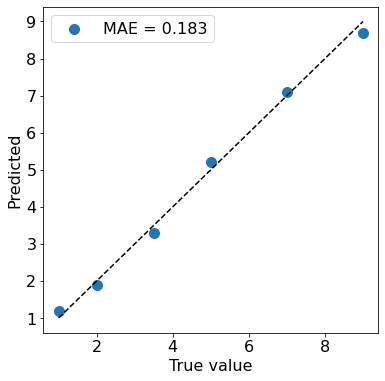

In [ ]:
y_pred_sample = [1.2, 1.9, 3.3, 5.2, 7.1, 8.7]

# r2_score(正解, 予測) でR^2を計算する
MAE = mean_absolute_error(y_true_sample, y_pred_sample)


# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(6,6))
plt.rcParams["font.size"] = 16

# 描画（散布図）
plt.plot([1, 9], [1, 9], "--", color="black")
plt.scatter(y_true_sample, y_pred_sample, 
            label=f"MAE = {MAE:.3f}", s=100)
plt.xlabel("True value")
plt.ylabel("Predicted")
plt.legend()

# 最終的な描画
plt.show()

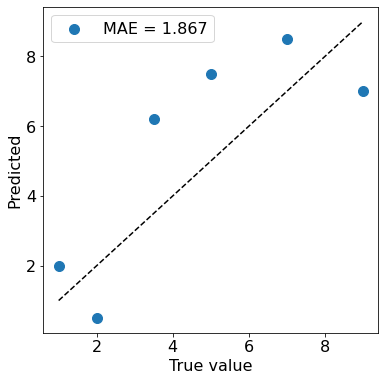

In [ ]:
y_pred_sample = [2, 0.5, 6.2, 7.5, 8.5, 7]

# r2_score(正解, 予測) でR^2を計算する
MAE = mean_absolute_error(y_true_sample, y_pred_sample)


# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(6,6))
plt.rcParams["font.size"] = 16

# 描画（散布図）
plt.plot([1, 9], [1, 9], "--", color="black")
plt.scatter(y_true_sample, y_pred_sample, 
            label=f"MAE = {MAE:.3f}", s=100)
plt.xlabel("True value")
plt.ylabel("Predicted")
plt.legend()

# 最終的な描画
plt.show()

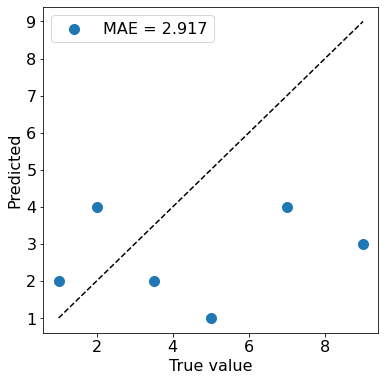

In [ ]:
y_pred_sample = [2, 4, 2, 1, 4, 3]

# r2_score(正解, 予測) でR^2を計算する
MAE = mean_absolute_error(y_true_sample, y_pred_sample)


# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(6,6))
plt.rcParams["font.size"] = 16

# 描画（散布図）
plt.plot([1, 9], [1, 9], "--", color="black")
plt.scatter(y_true_sample, y_pred_sample, 
            label=f"MAE = {MAE:.3f}", s=100)
plt.xlabel("True value")
plt.ylabel("Predicted")
plt.legend()

# 最終的な描画
plt.show()

---

#### <font color=blue>【練習】 MAEの計算と描画</font> 

上のコードを参考に、同じデータについてMAEを計算・グラフに記入せよ。
MAEは`r2_score`と同様に`mean_absolute_error(正解, 予測)`で計算できる。

また、予測精度が悪くなり、$R^2$が減少するにしたがってMAEが増加することを確認せよ。

---

最後に、今回の消費電力の予測結果について$R^2$とMAEを計算してみよう。

In [ ]:
r2_score(data["demand"], y_pred)

0.19902263869472225

In [ ]:
mean_absolute_error(data["demand"], y_pred)

321.429176297158

今回計算した結果の$R^2$は0.2程度なので、あまり予測精度は良くないと言えるだろう。
また、MAEは321程度だった。3000～4000程度の値を予測して平均300ほど誤っているので、平均して1割ほど間違っていると言える。

----

## 発展：データを見て工夫する


今回のデータ（下図）を見て、何か気付くことはないだろうか？


![](https://i.imgur.com/zAwLu1B.png)


今回のデータはよく見ると消費電力の多いグループと少ないグループの2グループあるように見える。

消費電力の多いグループと少ないグループが何によって分けられているかを考えてみよう。

---
#### <font color=blue>【発展練習】 消費電力の周期性</font> 

1. 今回利用したデータ**`data`**のうち、日付(**`data["date"]`**)を横軸、消費電力(**`data["demand"]`**)を縦軸にした棒グラフをプロットせよ。棒グラフは`plt.bar()`で描くことができる。

2. 1.の結果から、消費電力には日付に対して（ある程度の）周期性があることがわかる。この周期性が何に起因しているか考察せよ。

<details>
  <summary>ヒント （クリックで開く）</summary>
  2020/7/23, 2020/7/24はこの周期性の外れ値である。
  
</details>

---

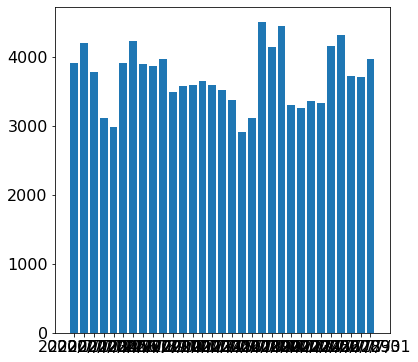

In [ ]:
plt.figure(figsize=(6,6))

plt.bar(data["date"], data["demand"])
plt.show()

さて、この周期性を考慮して、電力の多いグループだけについて予測を行ってみよう。

なお、第1, 2回でも触れられているように、データを分析から除外する場合は、**外れ値である理由が説明できるもののみ除外する**のが原則である。今回は上の練習の解答の通り、理由が明確であるため電力の多いグループに絞って解析を進めてみる。

<details>
  <summary>理由 （クリックで開く）</summary>
  
電力が少ないグループは休日（土日祝）である。休日は一部オフィス等が動いていないため電力消費が少ない。

7/23, 7/24は海の日・スポーツの日で、東京五輪開会式前日・当日に変更になったためこの日になっていた（五輪自体は延期になってしまったが）。
  
</details>

In [ ]:
# 電力の少ないグループの日付（外れ値を含む）
less_group_days = [
    "2020/7/4",
    "2020/7/5",
    "2020/7/11",
    "2020/7/12",
    "2020/7/18",
    "2020/7/19",
    "2020/7/23",
    "2020/7/24",
    "2020/7/25",
    "2020/7/26",
]

In [ ]:
# 条件に一致しないデータだけを取得
# data[~条件]でマッチしない要素だけを取得できる

data_high_demand = data[~data["date"].isin(less_group_days)]
data_high_demand.head()

,date,highest_temp,demand
0,2020/7/1,26.7,3909
1,2020/7/2,30.8,4194
2,2020/7/3,28.7,3777
5,2020/7/6,26.9,3899
6,2020/7/7,29.3,4223


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# モデルの学習（一次方程式の傾きと切片を決める）
x = data_high_demand["highest_temp"].to_numpy().reshape(-1, 1)
y = data_high_demand["demand"]
model.fit(x, y)

LinearRegression()

In [ ]:
# predict()関数で予測値を計算。
highest_temp = data_high_demand["highest_temp"].to_numpy().reshape(-1, 1) # 予測できる形式に変形
y_pred = model.predict(highest_temp) # 予測
y_pred

array([3857.64989318, 4233.72092699, 4041.09917797, 3875.99482166,
       4096.1339634 , 4022.75424949, 3802.61510775, 3986.06439253,
       3720.06292959, 3582.475966  , 3426.54407394, 3665.02814416,
       3298.12957459, 4334.61803362, 4068.61657069, 4151.16874884,
       4224.54846275, 4252.06585547, 3756.75278655, 3839.3049647 ,
       4123.65135612])

続いて、上と同様に$R^2$とMAEを計算してみる。

In [ ]:
r2_score(data_high_demand["demand"], y_pred)

0.8163289540035338

In [ ]:
mean_absolute_error(data_high_demand["demand"], y_pred)

107.61784674858245

精度が大きく改善していることがわかるだろう。

散布図でも確認してみよう。

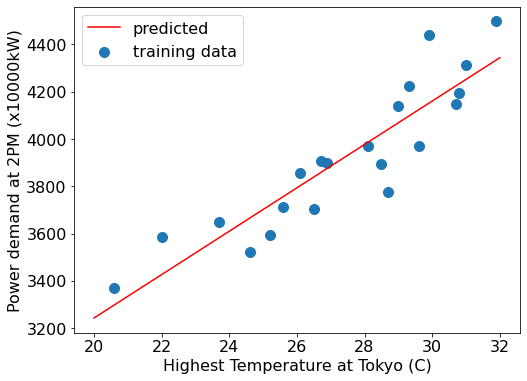

In [ ]:
# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 16

# グラフの作成（散布図）
plt.scatter(data_high_demand["highest_temp"], data_high_demand["demand"], 
            label=f"training data", s=100)

# ---ここを追加---
# 回帰結果の直線を描画
a = model.coef_[0]
b = model.intercept_
xg = np.arange(20, 33) # xのリストを用意
yg = a * xg + b # y = a * x + b でyを計算
plt.plot(xg, yg, color="red", label=f"predicted") # 直線をプロット
# ---ここまで---

# 軸ラベルの設定
plt.xlabel("Highest Temperature at Tokyo (C)")
plt.ylabel("Power demand at 2PM (x10000kW)")
plt.legend()

# 最終的な描画
plt.show()

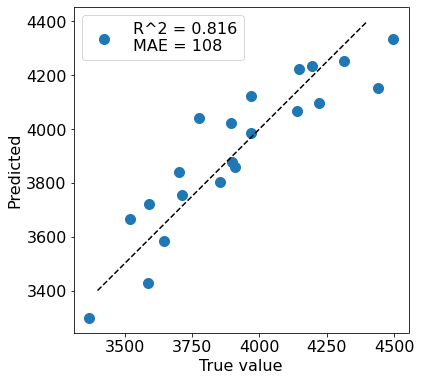

In [ ]:
# r2_score(正解, 予測) でR^2を計算する
r2 = r2_score(data_high_demand["demand"], y_pred)
mae = mean_absolute_error(data_high_demand["demand"], y_pred)

# 表示の設定（図の大きさとフォントサイズ）
plt.figure(figsize=(6,6))
plt.rcParams["font.size"] = 16

# 描画（散布図）
plt.plot([3400, 4400], [3400, 4400], "--", color="black")
plt.scatter(data_high_demand["demand"], y_pred, 
            label=f"R^2 = {r2:.3f}\nMAE = {mae:.0f}", s=100)
plt.xlabel("True value")
plt.ylabel("Predicted")
plt.legend()

# 最終的な描画
plt.show()

このように、手法が単純であっても、データの性質を知り、それに合った工夫をすることで分析の精度を大きく改善することができることは知っておくべきだろう。

---
#### <font color=blue>【練習】 低消費電力グループでの分析</font> 

上と同じ内容を消費電力の少ない方のグループに対しても行い、同様にデータを分ける前よりも予測精度が高くなることを確認せよ。

---

# 第4回 - 重回帰分析


第3回では**単回帰分析**を行い、一つの変数と一つの変数の関係を定量的に表す方法について学んだ。

第4回では**重回帰分析**を行う。この分析では一つの変数と複数の変数の関係を定量的に表すことができる。

## (1) データ分析目的の設定

これまでと同様に、(1) データ分析目的の設定、(2) データ収集・整理、(3) 分析・解析 の手順で演習を構築する。

第4回は引き続き、
**気象情報を基に将来の電力需要を予測する**ことを目的とし、東京における夏の日の気象情報と消費電力の関係を分析することにする。前回は気温のみから予測を行ったが、同じ気温25度であっても、晴れている日と雨の日では消費電力は異なってくるだろう（雨の日は蒸し暑いし暗い）。そこで、降水量の情報を加えてさらに分析を行うことにする。

## (2) データ収集・整理

第3回の演習で用いたデータを引き続き利用する。手元にデータが残っていない場合には、第3回の資料を参照しながら再度データを準備せよ。

さらに、降水量のデータを追加で[気象庁のデータベース](https://www.data.jma.go.jp/gmd/risk/obsdl/index.php)からダウンロードする。14時の降水量のデータはないようなので、その日の降水量で代用しよう。

ブラウザからこのページにアクセスし、「地点を選ぶ」から東京都→東京、
「項目を選ぶ」から「データの種類」を「日別値」に、「項目」を「**降水量の日合計**」のみ選択、「期間を選ぶ」から「連続した期間で表示する」、期間を「2020年7月1日から2020年7月31日まで」とする。設定が終わったら右の「CSVファイルをダウンロード」からファイルをダウンロードする。

![](https://i.imgur.com/r4gBzDi.png)

続いて、不要な行と列を削除する。今回はヘッダー部分を削除する。

その後、「年月日」と「降水量の合計(mm)」の列のみ残し、それぞれ"date", "precipitation"と名前をつけておく。

完成したら、`precipitation202007.csv`として保存し、Google colabにアップロードする。

![](https://i.imgur.com/YWmBOxW.png)

アップロードできたら、第3回で作成した`temp_demand202007.csv`に`precipitation`の列を追加しよう。

In [ ]:
# pandasライブラリを pd という名前で使えるようにする
# pd と省略形にするのが通例である
import pandas as pd

# pd.read_csv(CSVファイル名) とすることでデータを読むことができる
data_temp_demand = pd.read_csv("temp_demand202007.csv")
data_precipitation = pd.read_csv("precipitation202007.csv")

In [ ]:
# 二つの表を結合する
data = pd.concat([data_temp_demand, data_precipitation["precipitation"]], axis=1) # axis=1: 列方向に結合

なお、今回は第3回の発展部分で行ったデータの2グループの分割も先に行っておく。

In [ ]:
# 電力の少ないグループの日付（外れ値を含む）
less_group_days = [
    "2020/7/4",
    "2020/7/5",
    "2020/7/11",
    "2020/7/12",
    "2020/7/18",
    "2020/7/19",
    "2020/7/23",
    "2020/7/24",
    "2020/7/25",
    "2020/7/26",
]
# 条件に一致しないデータだけを取得
# data[~条件]でマッチしない要素だけを取得できる

data = data[~data["date"].isin(less_group_days)]
data.head()

,date,highest_temp,demand,precipitation
0,2020/7/1,26.7,3909,21.0
1,2020/7/2,30.8,4194,0.5
2,2020/7/3,28.7,3777,6.0
5,2020/7/6,26.9,3899,40.5
6,2020/7/7,29.3,4223,0.5


## (3) 分析・解析

### 単回帰の復習

まず、重回帰と比較するために単回帰の結果を確認しておこう。

---

#### <font color=blue>【練習】単回帰分析</font> 

第3回の資料を参考に以下を行え。

1. 回帰分析において、予測したい変数と、予測に使用する変数をそれぞれ何と呼ぶか答えよ。
2. 単回帰分析を行うための関数を答えよ。
3. 2020年7月の平日について、最高気温を$x$, 消費電力を$y$とした単回帰を行え。
4. 3.の単回帰について、決定係数$R^2$と平均絶対誤差MAEを求めよ。


---

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# モデルの学習（一次方程式の傾きと切片を決める）
x = data["highest_temp"].to_numpy().reshape(-1, 1)
y = data["demand"]
model.fit(x, y)

LinearRegression()

In [ ]:
# predict()関数で予測値を計算。
highest_temp = data["highest_temp"].to_numpy().reshape(-1, 1) # 予測できる形式に変形
y_pred = model.predict(highest_temp) # 予測
y_pred

array([3857.64989318, 4233.72092699, 4041.09917797, 3875.99482166,
       4096.1339634 , 4022.75424949, 3802.61510775, 3986.06439253,
       3720.06292959, 3582.475966  , 3426.54407394, 3665.02814416,
       3298.12957459, 4334.61803362, 4068.61657069, 4151.16874884,
       4224.54846275, 4252.06585547, 3756.75278655, 3839.3049647 ,
       4123.65135612])

In [ ]:
r2_score(data["demand"], y_pred)

0.8163289540035338

In [ ]:
mean_absolute_error(data["demand"], y_pred)

107.61784674858245

###重回帰分析

さて、今回の内容に入ろう。**重回帰分析**は複数の変数を利用する以外は単回帰とほぼ同じで、目的変数$y$を一次方程式で表す。説明変数が二つの場合、二つを$x_1,\ x_2$とすると

$$y = ax_1+bx_2+c$$
のようになる。

重回帰も機械学習ライブラリ`scikit-learn`（略称`sklearn`）の`LinearRegression`で行うことができ、単に入力を（データ数）行2列の表の状態で渡せばよい。

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

scikit-learnでのモデルの学習は`.fit()`で行うことができるのであった。

In [ ]:
# モデルの学習（一次方程式の傾きと切片を決める）
x = data[["highest_temp", "precipitation"]] # 2列だけ抜き出す
y = data["demand"]
model.fit(x, y)

LinearRegression()

In [ ]:
# 学習済みモデルから傾きa, bと切片cを取り出す
a = model.coef_[0] # coef: coefficient 係数
b = model.coef_[1]
c = model.intercept_ # intercept: 切片

print(a, b, c)

94.94435177917224 1.8119517132612744 1307.8276672373704


$y = ax_1+bx_2+c$ の $a,\ b,\ c$はそれぞれ約$94.9, 1.81, 1307$程度であった。つまり、$y＝94.9x_1+1.81x_2+1307$
の関係が推定されたことになる。

続いて、単回帰のときと同様に今回のデータにあった各日の気温に対して、今回のモデルの予測値がいくらになるかを計算してみる。単回帰と同様、scikit-learnでは`predict()`で予測を行うことができる。

In [ ]:
y_pred = model.predict(x)
y_pred

array([3880.89284572, 4233.01967789, 4043.60227358, 3935.21477448,
       4090.60315022, 4019.17754808, 3811.24257266, 3976.66992809,
       3711.29704235, 3568.88051468, 3408.38109252, 3644.36469686,
       3326.193648  , 4336.55248899, 4063.02582055, 4146.66378543,
       4226.24317028, 4254.72647582, 3738.40307278, 3823.85298939,
       4119.99243161])

さらに、重回帰の予測結果に対して$R^2$, MAEも計算してみる。

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
r2 = r2_score(y, y_pred)
r2

0.8198619668995407

In [ ]:
mae = mean_absolute_error(y, y_pred)
mae

103.7940576581065

単回帰での$R^2$, MAEはそれぞれ$0.816, 108$程度であった。

重回帰にすると$R^2$, MAEはそれぞれ$0.820, 104$程度になったので、少し予測精度が向上したと言えるだろう。

（$R^2$は大きい方がよく、MAEは小さい方がよい）

### 回帰結果の可視化

重回帰分析は説明変数が複数になっているので、説明変数と目的変数の間の関係は2次元で表すことができない。今回は説明変数が二つなので、予測結果は3次元空間上の（平）面になる。

ここでは3次元のプロットを実際に行い、説明変数と目的変数の間の関係を見てみることにする。3次元のプロットは`matplotlib`でも行うことができるが、`plotly`を使うとマウス操作で動かすことのできるグラフが作れるため、こちらを使ってみよう。

In [ ]:
# 平面グリッドの生成
x1 = np.arange(20, 35, 3)
x2 = np.arange(0, 45, 3)
X, Y = np.meshgrid(x1, x2)

# 平面の各点に対する予測
Z = model.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# plotlyによる3次元プロット
import plotly.express as px
import plotly.graph_objects as go

# データの3次元散布図
fig = px.scatter_3d(data, x="highest_temp", y="precipitation", z="demand")
fig.update_traces(marker=dict(size=3))

# 予測平面の描画
fig.add_traces(go.Surface(x=x1, y=x2, z=Z, colorscale='Blues'))

この3次元プロットはマウスの左ボタンで回転、右ボタンで平行移動、ホイールで拡大縮小ができる。

実際に予測結果が3次元上の平面になっていることがわかるだろう。

### 過学習とテストデータ

ここまで、$R^2$やMAEを用いて予測結果の良し悪しを判断してきた。しかし、この結果はあくまで**回帰モデルを作るために使ったデータに対する予測**の良し悪しであって、本来行いたかった**未知のデータに対する予測**の良し悪しを表しているわけではない。

この二つがどのように異なるか、人工的に作ったデータを用いて複数の予測モデルを比較することで見てみよう。

今回のデータは$y = \sin(x)$から作っているが、少しノイズが足されている（縦方向に少しずれている）。

In [ ]:
# データセットを用意
import numpy as np
x_sample = np.array([-2.542, 1.680, -0.370, 1.341, 2.868,
                     0.231, 0.007, -2.568, -1.389, -0.001]).reshape(-1, 1)
y_sample = np.array([-0.462, 1.054, -0.424, 0.957, 0.321,
                     0.203, -0.018, -0.688, -0.928, 0.012]).reshape(-1, 1)

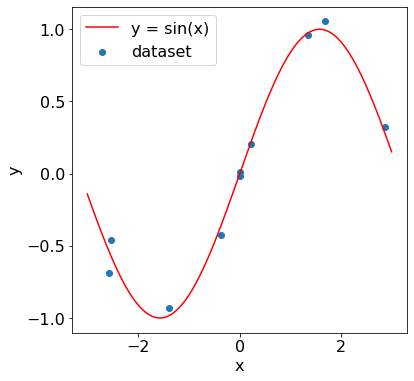

In [ ]:
# データセットの散布図を描画
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
xg = np.arange(-3, 3, 0.01) # xを用意
yg = np.sin(xg) # y=sin(x)
plt.plot(xg, yg, "red", label="y = sin(x)") # 赤線を描画

plt.scatter(x_sample, y_sample, label="dataset") # データセットの散布図を描画

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

さて、このデータセットを3次関数と6次関数で推定したとき、予測はどうなるだろうか。

ここでは説明のため一時的に多項式回帰（目的変数を説明変数の一次関数ではなく二次以上の項も使って予測する）を用いる。重回帰からは少し外れるので、ここのコードはいったん眺めるだけでもよい。

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

p = 3 # 3次関数

# 3次の項までを計算
x_poly = PolynomialFeatures(degree=p, include_bias=False).fit_transform(x_sample)

# 3次の項までを使って学習&予測
model_3 = LinearRegression()
model_3.fit(x_poly, y_sample)
y_pred_3 = model_3.predict(x_poly)


In [ ]:
p = 6 # 6次関数

# 6次の項までを計算
x_poly = PolynomialFeatures(degree=p, include_bias=False).fit_transform(x_sample)

# 6次の項までを使って学習&予測
model_6 = LinearRegression()
model_6.fit(x_poly, y_sample)
y_pred_6 = model_6.predict(x_poly)


この二つのモデルに対して、訓練データ（モデルの構築に使ったデータ）に対する$R^2$とMAEを計算してみると、以下のようになる。

In [ ]:
# 3次関数のモデル
r2_3 = r2_score(y_sample, y_pred_3)
mse_3 = mean_absolute_error(y_sample, y_pred_3)
print(f"R^2: {r2_3:.3f}")
print(f"MSE: {mse_3:.3f}")

R^2: 0.989
MSE: 0.045


In [ ]:
# 6次関数のモデル
r2_6 = r2_score(y_sample, y_pred_6)
mse_6 = mean_absolute_error(y_sample, y_pred_6)
print(f"R^2: {r2_6:.3f}")
print(f"MSE: {mse_6:.3f}")

R^2: 0.996
MSE: 0.031


この結果を見ると、6次関数のモデルの方が優れているように見える。

では、実際に予測結果を可視化してみるとどうなるだろうか。

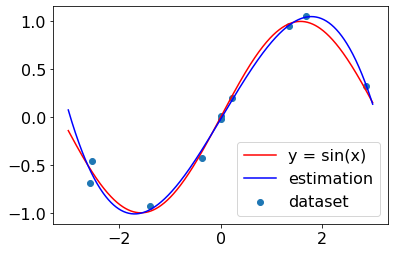

In [ ]:
# y=sin(x)の線を描画
xg = np.arange(-3, 3, 0.01)
yg = np.sin(xg)
plt.plot(xg, yg, "red", label="y = sin(x)")

# データセットを描画
plt.scatter(x_sample, y_sample, label="dataset")

# 用意したxに対してyを予測（三次関数）
xg = xg[:, np.newaxis] # Convert it into matrix
xg_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(xg)
y_est = model_3.predict(xg_poly)

# 予測した線を描画
plt.plot(xg, y_est, "blue", label="estimation")

plt.legend(loc = "lower right") # Display legend
plt.show()

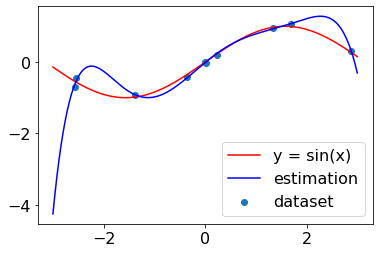

In [ ]:
# y=sin(x)の線を描画
xg = np.arange(-3, 3, 0.01)
yg = np.sin(xg)
plt.plot(xg, yg, "red", label="y = sin(x)")

# データセットを描画
plt.scatter(x_sample, y_sample, label="dataset")

# 用意したxに対してyを予測（6次関数）
xg = xg[:, np.newaxis] # Convert it into matrix
xg_poly = PolynomialFeatures(degree=6, include_bias=False).fit_transform(xg)
y_est = model_6.predict(xg_poly)

# 予測した線を描画
plt.plot(xg, y_est, "blue", label="estimation")

plt.legend(loc = "lower right") # Display legend
plt.show()

どうだろうか。3次関数のモデルはおおむね真の関数$y=\sin(x)$のような形状になっているのに対して、6次関数のモデルは明らかに真の関数からかけ離れていることが見て取れる。

6次関数の場合、3次多項式の要素$x^1, x^2, x^3$は全て含まれており、3次多項式と同程度以上の高精度な予測が期待できるはずなのだが、$x^4, x^5, x^6$の情報を使って観測データをより詳細に、**観測誤差までも**予測しようとし、結果として元の関数の形状を推定できなくなっている。これは**過剰適合(overfitting, 過学習ともいう)**と呼ばれる現象であり、**データ数が少なく、説明変数が多い**時に特に発生しやすい。

では、予測結果が過剰適合しているかどうかをどのように判断すればよいのだろうか。
本来の**未知のデータに対する予測**を行うという目的に立ち返って、**学習に使っていないデータ**（**テストデータ**と呼ぶ）を予測してみればよい。

新たにデータを用意して予測させ、$R^2$とMAEを見てみよう。

In [ ]:
# 別に生成したデータ
x_sample_test = np.array([2.241, 2.811, 2.215, 0.185, -1.604,
                          -2.932, -0.417, -0.586, 0.136, -0.130]).reshape(-1, 1)
y_sample_test = np.array([0.957, 0.545, 0.879, 0.282, -1.118,
                          -0.017, -0.518, -0.619, 0.098, -0.208]).reshape(-1, 1)

In [ ]:
# 3次の項までを計算
x_poly_test = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_sample_test)

# 3次の項までを使ってテストデータを予測
y_pred_3_test = model_3.predict(x_poly_test)

# 6次の項までを計算
x_poly_test = PolynomialFeatures(degree=6, include_bias=False).fit_transform(x_sample_test)

# 6次の項までを使ってテストデータを予測
y_pred_6_test = model_6.predict(x_poly_test)

In [ ]:
# 3次関数モデルのテストデータでの精度
r2_3 = r2_score(y_sample_test, y_pred_3_test)
mse_3 = mean_absolute_error(y_sample_test, y_pred_3_test)
print(f"R^2: {r2_3:.3f}")
print(f"MSE: {mse_3:.3f}")

R^2: 0.977
MSE: 0.082


In [ ]:
# 6次関数モデルのテストデータでの精度
r2_6 = r2_score(y_sample_test, y_pred_6_test)
mse_6 = mean_absolute_error(y_sample_test, y_pred_6_test)
print(f"R^2: {r2_6:.3f}")
print(f"MSE: {mse_6:.3f}")

R^2: -1.855
MSE: 0.469


結果、訓練データでの精度は6次関数のモデルの方がよかったが、テストデータでの精度は3次関数のモデルの方がよかった。

一般に、**回帰モデルの精度の評価はモデルの構築に用いていないテストデータで行う**ことが望ましい。
既存のデータをすべてモデルの構築に使うのではなく
一部をテストデータに回すことによって、モデルのより正確な評価が可能になる。

### 消費電力予測の評価

さて、話を消費電力予測モデルに戻し、テストデータを用いて予測モデルの精度を評価したい。今回は一ヶ月分しかデータを持っていないので、1/3をテストデータにしよう。

このとき、一般的なデータではランダムにデータを分割すればよいが、**時系列データでは必ず時系列で最後の部分をテストデータにする**ことに注意してほしい。これは、より未来の情報を使って過去の情報を予測すると**未知のデータに対する予測として適当でない**ケースがあるからだ。例えば、

「今朝8時と10時の気温を聞いて9時の気温を当てる」と、

「今朝8時と9時の気温を聞いて10時の気温を当てる」の二つの問題を考える。

ほとんどの場合9時の気温は8時の気温と10時の気温の中間くらいであるから、前者は未来の情報を使ったことで問題が簡単になってしまった。このようなケースを防ぐため、**時系列のデータは必ず時系列で分割する**必要があるわけだ。

では、今回のデータを時系列で分割してみる。今回のデータは21件あるので、14件を訓練データに、7件をテストデータにする。

In [ ]:
# 日付順に並んでいるので、
# 最初の14件を訓練データに、残りをテストデータにする
data_train = data.iloc[:14, :]
data_test = data.iloc[14:, :]

In [ ]:
# モデルの学習（一次方程式の傾きと切片を決める）
x_train = data_train[["highest_temp", "precipitation"]] # 2列だけ抜き出す
y_train = data_train["demand"]

model = LinearRegression()
model.fit(x_train, y_train) # fitで学習

LinearRegression()

In [ ]:
# テストデータに対する予測
x_test = data_test[["highest_temp", "precipitation"]]
y_test = data_test["demand"]

y_pred = model.predict(x_test) # predictで予測

In [ ]:
# テストデータに対する精度評価
r2 = r2_score(y_test, y_pred)
r2

0.6915876249980928

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

117.18899141061274

最終的な精度は$R^2$は0.69, MAEは117となった。$R^2$の目安から言えばこの値はかなり良いと言えるので、本来の目的が達成できたと言えるだろう。

---
#### <font color=blue>【練習】モデルの比較</font> 

単回帰分析に対して、同様に訓練データとテストデータに分けて電力予測のモデルを構築し、$R^2$とMAEを計算せよ。

また、その結果を重回帰のモデルと比較せよ。

（単回帰：最高気温と電力需要のモデルに降水量のデータを加えたとき、未来のデータに対する予測精度は向上したと言えるだろうか？）

----

In [ ]:
# 日付順に並んでいるので、
# 最初の14件を訓練データに、残りをテストデータにする
data_train = data.iloc[:14, :]
data_test = data.iloc[14:, :]


# モデルの学習（一次方程式の傾きと切片を決める）
x_train = data_train[["highest_temp"]] # 2列だけ抜き出す
y_train = data_train["demand"]

model_single = LinearRegression()
model_single.fit(x_train, y_train) # fitで学習

LinearRegression()

In [ ]:
# テストデータに対する予測
x_test = data_test[["highest_temp"]]
y_test = data_test["demand"]

y_pred = model_single.predict(x_test) # predictで予測

In [ ]:
# テストデータに対する精度評価
r2 = r2_score(y_test, y_pred)
r2

0.6877259505131248

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

120.91651734508858

### 回帰の式の解釈

最後に、重回帰で得られた式の解釈を知っておこう。

なお、以降の解釈を行うにはまずある程度以上妥当な回帰モデルが得られている必要がある。**ダメなモデルを解釈してもダメな解釈が得られるだけ**である。

まず、訓練データとテストデータに分けて構築したモデルで得られた係数から予測の式を得よう。

---
#### <font color=blue>【練習】 予測の式を取り出す</font> 

「重回帰分析」の節を参考に、訓練データとテストデータに分けた電力予測のモデルから予測の式を取り出せ。結果は
$$y＝ax_1+bx_2+c$$
の形にすること。

$x_1$: 最高気温

$x_2$: 降水量

----

In [ ]:
# 学習済みモデルから傾きa, bと切片cを取り出す
a = model.coef_[0] # coef: coefficient 係数
b = model.coef_[1]
c = model.intercept_ # intercept: 切片

print(a, b, c)

89.412098817121 1.5027663117221164 1454.550716489065


$$y=89.4x_1 + 1.5x_2 + 1455$$

回帰の式が得られたらその係数、特に$a, b$に着目する（$c$は説明変数$x_1, x_2$に依存しない定数なので、そこまで重要ではない）。

まずは、これらの値の符号に着目しよう。例えば$a$が正の値なら、$x_1$が増加すれば$y$が増加し、$x_1$が減少すれば$y$も減少する、つまり$x_1$と$y$には正の相関があると言える。$a$が負の値なら逆に負の相関がある。

続いて、これらの値の絶対値の大きさに着目しよう。値が大きいほど説明変数の変化が目的変数に大きく影響するので、絶対値が大きいほどその相関が強いと言える。

ただし、データの値の大きさ（スケール、または分散）に差がある場合には注意が必要である。例えば$x_1$の値が$x_2$の100倍あるといったケースでは、同じ係数でも$y$に与える影響は100倍になる。（注４）

以上の内容を踏まえて、総合実践で実際に分析を行ってみよう。

----

# <font color=red>【総合実践】 自身のデータに対する分析</font> 

第3回、第4回を通して学んだ内容について、自らが興味を持っている課題に対して実施してみよ。**回帰を行う際には、訓練データとテストデータを必ず用意し、テストデータに対する精度を計算せよ。**

ただし、**非公開データをGoogle Colaboratoryにアップロードしないように注意せよ**（Google社はアップロードされた任意のデータを使う権利を有している）。

もしテーマを思いつかない場合には、e-Statの他にも

- 気象観測データ https://www.data.jma.go.jp/obd/stats/etrn/
- エネルギー関連データ https://www.enecho.meti.go.jp/statistics/analysis/
  - 電力調査統計 https://www.enecho.meti.go.jp/statistics/electric_power/ep002/ などが含まれている
- 交通関連データ https://www.mlit.go.jp/statistics/details/tetsudo_list.html

など、公的機関は多くのデータを公開している（ただし、かなり処理が面倒なデータも多い）。これらの中からテーマを選ぶのも良いだろう。


----


<details>
  <summary>5分くらい経っても何をしようか思いつかない人向け （クリックで開く）</summary>

  * 第1, 2回で行ったデータに関連して、県民一人当たりの所得を人口に加えて産業構造などいくつかの変数を追加して予測する
  * [糖尿病データセット](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)など、機械学習のサンプルデータセットを探す

</details>


# おわりに

本演習では、実例等を用いてデータサイエンス・AIの諸技術のうち、基礎・基盤となる以下の要素について学んだ。

- データ可視化
- 統計量の算出（平均値・中央値など）
- 相関分析
- 回帰分析

本演習は「データサイエンス・AIを利活用するスキルを身に付けるための基礎的素養を習得する」ものであるが、**学んだ基礎技術を積極的に活用していくことが、データサイエンス・AIを利活用するスキルを習得する近道**である。実際の活用を試みる中で発生する疑問や興味を書籍で解決することで、さらに深くデータサイエンス・AIを理解し、実践応用できるようになるだろう。

---

# 注釈・補足

##注１：連続ではない値を予測したい場合は？
連続ではない値のことを離散値という。離散値の中にも大小関係があるもの（人数など）と、大小関係のないもの（カテゴリ。曜日、動物の種類など）がある。

大小関係がある離散値を予測したい場合は回帰分析でひとまず解析を行い、最も近い値のグループに予測させれば概ね良い。大小関係がないものを予測したい場合は分類問題を解く手法を用いるとよいだろう。

## 注２：順序が異なる状態で表を結合したい場合は？
順序が異なる二つの表を、共通の列をもとに結合したい場合は下のように`join`を使う。

In [ ]:
# 表1.join(表2)で二つの表を結合する。
# 結合する際には共通の（結合する際に探す）列を指定する
# 表1はonパラメータに指定、表2はset_indexに指定
# data = temperature.join(demand.set_index("date"), on="date")

##注３：決定係数$R^2$は相関係数$R$の二乗なのか？
決定係数は相関係数の二乗であるとよく紹介されるが、相関係数rの二乗そのものではない。例えば決定係数に下限はなく負の値をとることもあるが、相関係数の二乗は0以上の値しかとらない。

##注４：データの大きさをそろえるには

データ分析の前処理としてデータの大きさを揃える方がよいことがよくある。

この場合、それぞれの変数を標準化（平均0・分散1にする操作）を行うことでデータの大きさを揃えることができる。

標準化はscikit-learnでは`sklearn.preprocessing.StandardScaler`で使うことができる。